# Central Limit Theorem:



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### We have a red coin, for which  P(Heads)=0.4 , a green coin, for which  P(Heads)=0.5 , and a yellow coin, for which  P(Heads)=0.6 . The flips of the same or of different coins are independent. For each of the following situations, determine whether the random variable  N  can be approximated by a normal.

In [55]:
p_r = 0.4
p_g = 0.5
p_y = 0.6

#### 1. Let  N  be the number of Heads in 300 tosses of the red coin.

In [56]:
n = 300
trials = 1000
coins = ['red', 'green', 'yellow']
outcomes=[1,0]


In [60]:
all_outcomes = []

for trial in range(trials):
    heads = 0
    for toss in range(n):
        outcome = np.random.choice(outcomes, p=[0.4, 0.6])
        heads += outcome
    all_outcomes.append(heads)

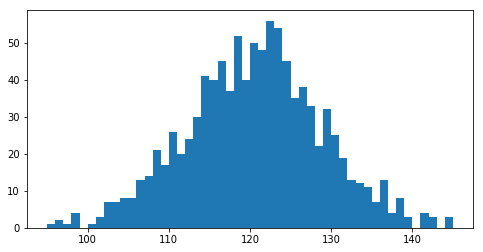

In [61]:
plt.figure(figsize=(8,4))
plt.hist(np.array(all_outcomes), bins=50)
plt.show()

#### 2. Let  N  be the number of Heads in 300 tosses. At each toss, one of the three coins is selected at random (either choice is equally likely), and independently from everything else.

In [68]:
all_outcomes = []

for trial in range(trials):
    heads = 0
    for toss in range(n):
        coin = np.random.choice(coins)
        if coin == 'red':
            p = p_r
        elif coin == 'green':
            p = p_g
        else:
            p = p_y
        outcome = np.random.choice(outcomes, p=[p, 1-p])
        heads += outcome
    all_outcomes.append(heads)

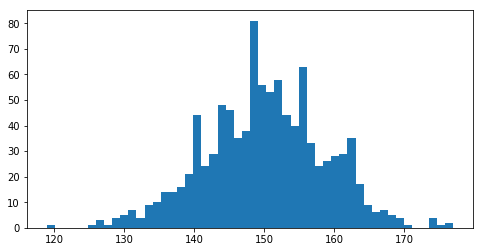

In [69]:
plt.figure(figsize=(8,4))
plt.hist(np.array(all_outcomes), bins=50)
plt.show()

In [70]:
np.mean(all_outcomes)

150.117

In [71]:
np.std(all_outcomes)**2

73.85531100000001

#### 3. Let  N  be the number of Heads in 100 tosses of the red coin, followed by 100 tosses of the green coin, followed by 100 tosses of the yellow coin (for a total of 300 tosses).

In [64]:
all_outcomes = []

for trial in range(trials):
    heads = 0
    for toss in range(n//3):
        outcome = np.random.choice(outcomes, p=[p_r, 1-p_r])
        heads += outcome
    for toss in range(n//3):
        outcome = np.random.choice(outcomes, p=[p_g, 1-p_g])
        heads += outcome
    for toss in range(n//3):
        outcome = np.random.choice(outcomes, p=[p_y, 1-p_y])
        heads += outcome
    all_outcomes.append(heads)

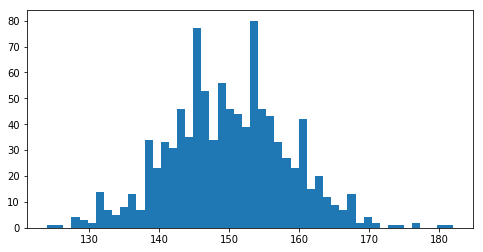

In [65]:
plt.figure(figsize=(8,4))
plt.hist(np.array(all_outcomes), bins=50)
plt.show()

#### 4. We select one of the three coins at random: each coin is equally likely to be selected. We then toss the selected coin 300 times, independently, and let  N  be the number of Heads.

In [66]:
all_outcomes = []

for trial in range(trials):
    heads = 0
    coin = np.random.choice(coins)
    if coin == 'red':
        p = p_r
    elif coin == 'green':
        p = p_g
    else:
        p = p_y
    for toss in range(n):
        outcome = np.random.choice(outcomes, p=[p, 1-p])
        heads += outcome
    all_outcomes.append(heads)

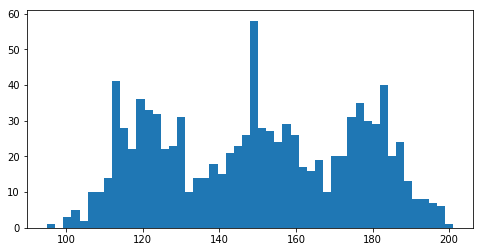

In [67]:
plt.figure(figsize=(8,4))
plt.hist(np.array(all_outcomes), bins=50)
plt.show()

### Consider the class average in an exam in a few different settings. In all cases, assume that we have a large class consisting of equally well-prepared students. Think about the assumptions behind the central limit theorem, and choose the most appropriate response under the given description of the different settings.


#### 1. Consider the class average in an exam of a fixed difficulty.

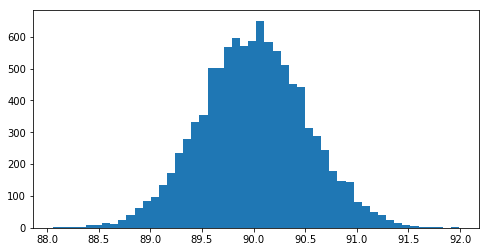

In [2]:
n_students = 100
n_exams = 10000
score = 90

all_scores = []
for exam in range(n_exams):
    scores = 0
    for student in range(n_students):
        noise = np.random.normal(0,5)
        scores += score + noise
    all_scores.append(np.mean(scores))
    
plt.figure(figsize=(8,4))
plt.hist(np.array(all_scores)/100, bins=50)
plt.show()

#### 2. Consider the class average in an exam that is equally likely to be very easy or very hard.

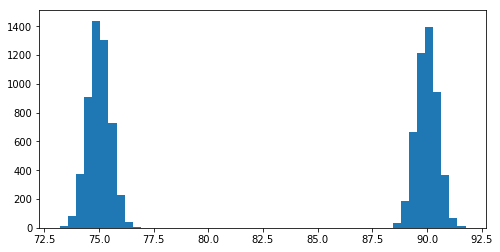

In [3]:
n_students = 100
exam_types = ['easy', 'hard']
n_exams = 10000
all_scores = []

for exam in range(n_exams):
    scores = 0
    difficulty = np.random.choice(exam_types)
    if difficulty == 'easy':
        score = 90
    else:
        score = 75
    for student in range(n_students):
        noise = np.random.normal(0,5)
        scores += score + noise
    all_scores.append(np.mean(scores))

plt.figure(figsize=(8,4))
plt.hist(np.array(all_scores)/100, bins=50)
plt.show()

#### 3. Consider the class average if the class is split into two equal-size sections. One section gets an easy exam and the other section gets a hard exam.

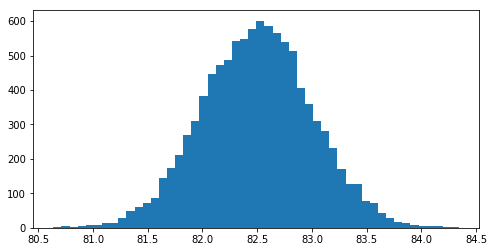

In [4]:
n_students = 100
n_exams = 10000
all_scores = []

for exam in range(n_exams):
    scores = 0
    for student in range(n_students//2):
        score = 90
        noise = np.random.normal(0,5)
        scores += score + noise
    for student in range(n_students//2):
        score = 75
        noise = np.random.normal(0,5)
        scores += score + noise
    all_scores.append(np.mean(scores))
    
plt.figure(figsize=(8,4))
plt.hist(np.array(all_scores)/100, bins=50)
plt.show()

#### 4. Consider the class average if every student is (randomly and independently) given either an easy or a hard exam.




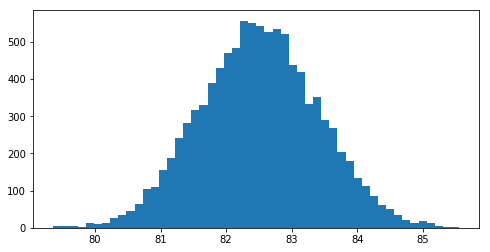

In [5]:
n_students = 100
exam_types = ['easy', 'hard'] # 90/60
n_exams = 10000
all_scores = []

for exam in range(n_exams):
    scores = 0
    for student in range(n_students):
        difficulty = np.random.choice(exam_types)
        if difficulty == 'easy':
            score = 90
        else:
            score = 75
        noise = np.random.normal(0,5)
        scores += score + noise
    all_scores.append(np.mean(scores))

plt.figure(figsize=(8,4))
plt.hist(np.array(all_scores)/100, bins=50)
plt.show()